In this file we try to train a ConvNet from scrach. 

In [1]:
%matplotlib inline

In [2]:
import os
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Lambda, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, plot_model

Using TensorFlow backend.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = "/nfs/turbo/intmed-bnallamo-turbo/wsliu/Data/UC_colonoscopy/"
model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [10]:
batch_size=32

In [11]:
train_datagen = ImageDataGenerator( 
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
        rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        path+'splitted/train/',  # this is the target directory
        target_size=(512, 640),  
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        path+'splitted/validation/',
        target_size=(512, 640),
        batch_size=batch_size,
        class_mode='categorical')

Found 5939 images belonging to 4 classes.
Found 1494 images belonging to 4 classes.


In [20]:
show_gen = ImageDataGenerator().flow_from_directory(path+'categorized/train/', target_size=(256, 320), class_mode='categorical', shuffle=True,
                                    batch_size=8)
show_batch, show_label = next(show_gen)

Found 5939 images belonging to 4 classes.


In [21]:
show_label

array([[ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.]], dtype=float32)

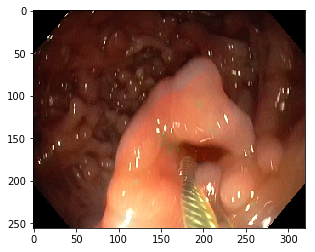

In [31]:
plt.imshow(show_batch[4].astype(np.uint8))

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(512, 640, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())  
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(4))
model.add(Activation('softmax'))

In [13]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.5, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 510, 638, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 255, 319, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 253, 317, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 126, 158, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 124, 156, 128)     73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 78, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 76, 256)       295168    
__________

In [14]:
model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        verbose=1);

Epoch 1/1


ResourceExhaustedError: OOM when allocating tensor with shape[291840,512]
	 [[Node: dense_3/kernel/Assign = Assign[T=DT_FLOAT, _class=["loc:@dense_3/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_3/kernel, dense_3/random_uniform)]]

Caused by op 'dense_3/kernel/Assign', defined at:
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-b6e320a19375>", line 15, in <module>
    model.add(Dense(512))
  File "/home/wsliu/.local/lib/python3.5/site-packages/keras/models.py", line 489, in add
    output_tensor = layer(self.outputs[0])
  File "/home/wsliu/.local/lib/python3.5/site-packages/keras/engine/topology.py", line 576, in __call__
    self.build(input_shapes[0])
  File "/home/wsliu/.local/lib/python3.5/site-packages/keras/layers/core.py", line 830, in build
    constraint=self.kernel_constraint)
  File "/home/wsliu/.local/lib/python3.5/site-packages/keras/legacy/interfaces.py", line 87, in wrapper
    return func(*args, **kwargs)
  File "/home/wsliu/.local/lib/python3.5/site-packages/keras/engine/topology.py", line 400, in add_weight
    constraint=constraint)
  File "/home/wsliu/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 385, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "/home/wsliu/.local/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 213, in __init__
    constraint=constraint)
  File "/home/wsliu/.local/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 346, in _init_from_args
    validate_shape=validate_shape).op
  File "/home/wsliu/.local/lib/python3.5/site-packages/tensorflow/python/ops/state_ops.py", line 276, in assign
    validate_shape=validate_shape)
  File "/home/wsliu/.local/lib/python3.5/site-packages/tensorflow/python/ops/gen_state_ops.py", line 57, in assign
    use_locking=use_locking, name=name)
  File "/home/wsliu/.local/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/wsliu/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/wsliu/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[291840,512]
	 [[Node: dense_3/kernel/Assign = Assign[T=DT_FLOAT, _class=["loc:@dense_3/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_3/kernel, dense_3/random_uniform)]]


In [10]:
y_pred = model.predict_generator(validation_generator)
y_pred_class = y_pred.argmax(axis=1)

In [11]:
sum(y_pred_class == 0), sum(y_pred_class == 1),sum(y_pred_class == 2), sum(y_pred_class == 3)

(1287, 57, 102, 48)

In [16]:
y_pred_class[-50:]

array([0, 0, 0, 0, 1, 0, 0, 2, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
model.save_weights(path+'models/conv_max4_cam.h5')